# 資料準備

In [172]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 建立共用函數

In [0]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),
                       name ='W')

In [0]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape)
                       , name = 'b')

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], 
                        padding='SAME')

In [0]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')

# 輸入層 Input Layer

In [0]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float",shape=[None, 784]
                       ,name="x")    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolutional Layer 1

In [0]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )

In [0]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

# Convolutional Layer 2

In [0]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)

In [0]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 

# Fully Connected Layer

In [0]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [0]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(
                  tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, 
                                keep_prob=0.8)

# 輸出層Output

In [0]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(
                 tf.matmul(D_Hidden_Dropout,
                           W4)+b4)

# 設定訓練模型最佳化步驟

In [0]:
with tf.name_scope("optimizer"):
    
    y_label = tf.placeholder("float", shape=[None, 10], 
                              name="y_label")
    
    loss_function = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) \
                    .minimize(loss_function)

# 設定評估模型

In [0]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 訓練模型

In [0]:
trainEpochs = 3
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [188]:
for epoch in range(trainEpochs):

    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         

Train Epoch: 01 Loss= 1.661598444  Accuracy= 0.8194
Train Epoch: 02 Loss= 1.545250893  Accuracy= 0.931
Train Epoch: 03 Loss= 1.520473838  Accuracy= 0.9488
Train Finished takes: 11.142988920211792


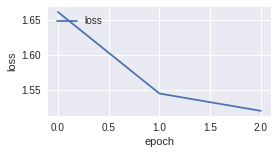

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

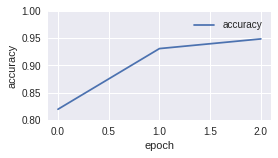

In [190]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


# 評估模型準確率

In [191]:
len(mnist.test.images)

10000

In [192]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images,
                                   y_label: mnist.test.labels}))

Accuracy: 0.9467


In [193]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[:5000],
                                   y_label: mnist.test.labels[:5000]}))


Accuracy: 0.924


In [194]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[5000:],
                                   y_label: mnist.test.labels[5000:]}))

Accuracy: 0.9632


# 預測機率

In [195]:
#y_predict=sess.run(y_predict, feed_dict={x: mnist.test.images[:5000]})
print(mnist.test.images[0].shape)

(784,)


In [196]:
y_predict[:5]

<tf.Tensor 'strided_slice_1:0' shape=(?, 10) dtype=float32>

# 預測結果

In [0]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images ,
                                      y_label: mnist.test.labels})

In [198]:
prediction_result[:10]


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
import numpy as np
def show_images_labels_predict(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 10):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[i],(28, 28)), 
                  cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[i]))+
                     ",predict="+str(prediction_result[i])
                     ,fontsize=9) 
    plt.show()

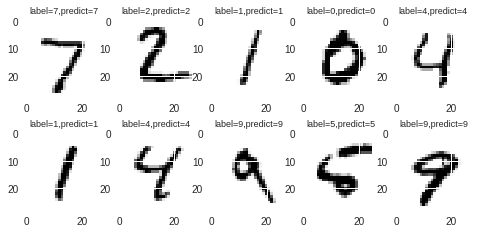

In [200]:
show_images_labels_predict(mnist.test.images,mnist.test.labels,prediction_result)

# 找出預測錯誤

In [201]:
for i in range(500):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=73   label= 9 predict= 7
i=115   label= 4 predict= 9
i=121   label= 4 predict= 6
i=144   label= 7 predict= 9
i=184   label= 8 predict= 3
i=217   label= 6 predict= 5
i=233   label= 8 predict= 7
i=241   label= 9 predict= 8
i=257   label= 8 predict= 1
i=259   label= 6 predict= 0
i=290   label= 8 predict= 4
i=318   label= 2 predict= 3
i=320   label= 9 predict= 1
i=321   label= 2 predict= 7
i=324   label= 0 predict= 9
i=340   label= 5 predict= 3
i=341   label= 6 predict= 4
i=362   label= 2 predict= 7
i=403   label= 8 predict= 7
i=435   label= 8 predict= 7
i=444   label= 2 predict= 8
i=445   label= 6 predict= 0
i=448   label= 9 predict= 8
i=449   label= 3 predict= 5
i=464   label= 3 predict= 7
i=468   label= 7 predict= 9
i=479   label= 9 predict= 3
i=495   label= 8 predict= 0


In [0]:
def show_images_labels_predict_error(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i=0;j=0
    while i<10:
        if prediction_result[j]!=np.argmax(labels[j]):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(np.reshape(images[j],(28, 28)), 
                      cmap='binary')
            ax.set_title("j="+str(j)+
                         ",l=" +str(np.argmax(labels[j]))+
                         ",p="+str(prediction_result[j])
                         ,fontsize=9) 
            i=i+1  
        j=j+1
    plt.show()

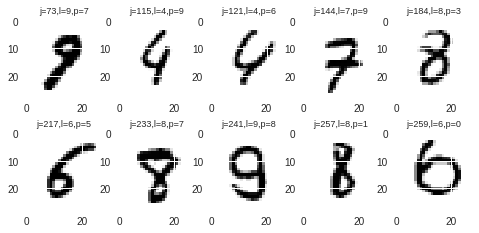

In [203]:
show_images_labels_predict_error(mnist.test.images,mnist.test.labels,prediction_result)

In [0]:
saver = tf.train.Saver()

In [0]:
save_path = saver.save(sess, "saveModel/CNN_model1")

In [206]:
print("Model saved in file: %s" % save_path)

Model saved in file: saveModel/CNN_model1


In [0]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)

In [0]:
#sess.close()

In [209]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [210]:
import os
os.chdir("/content/drive/My Drive/ColabNotebooks")
cwd = os.getcwd()
print(cwd)
!ls

/content/drive/My Drive/ColabNotebooks
 bin2result.png			        p3.png
 courses			        predictionimages
 dogandcat			        pretrainedmodel
 drive				        RunMinstByPython.ipynb
 hellowgooglemap.ipynb		        saveModel
 Lecturesavestoremodelpredict.py        SegNetCMR
'loadmodel andrunmedimgsegment.ipynb'   Tensorflow_Mnist_CNN.ipynb
 log				        Tensorflow_Mnist_MLP_h256.ipynb
 MNIST				        testdir.ipynb
 mnist2				        testplotimage0.ipynb
 mnist_cnn.py			        tmp
 MNIST_data			        trainandpredict.ipynb
 object_detection.ipynb		        TrainModelandSave.ipynb
 p2.png


(28, 28)


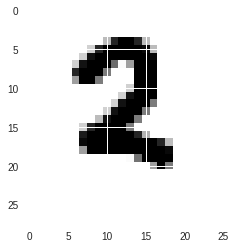

In [211]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('p2.png') # 画像の読み込み
img=1.0-img[:,:,0]
plt.imshow(img)
print(img.shape)
#print(img)
#print(mnist.test.images[0].shape)
#img0=np.reshape(mnist.test.images[0],(28, 28))
#plt.imshow(img0)
#print(img0.shape)

plt.show()

In [216]:
img=img.reshape(784)
print(img.shape)
mnist.test.images[0]=img
#y_predict=sess.run(y_predict, feed_dict={x: mnist.test.images[:5]})
y_predict0=sess.run(y_predict, feed_dict={x: mnist.test.images[:5]})

(784,)


In [214]:
y_predict0[0]

array([[5.8955878e-13, 2.2637148e-09, 9.9999142e-01, 3.3630022e-06,
        8.2440632e-09, 9.2909846e-12, 5.1717202e-06, 6.9574742e-11,
        7.0606774e-08, 1.0673511e-09],
       [4.1188244e-09, 1.1181656e-12, 9.9999928e-01, 7.1093581e-07,
        1.7621164e-16, 1.3911165e-10, 2.6569098e-09, 2.2523286e-16,
        1.8001955e-08, 2.1434558e-16],
       [1.5668397e-07, 9.9980539e-01, 2.4595392e-05, 1.1792060e-06,
        2.2852955e-05, 2.6823889e-07, 4.1882045e-05, 6.5655928e-05,
        2.8076769e-05, 1.0031953e-05],
       [9.9999821e-01, 1.0123086e-12, 6.1056751e-09, 1.8800663e-09,
        3.8933717e-12, 1.0907945e-06, 7.5179554e-07, 3.0767739e-09,
        2.3251545e-11, 1.8224911e-08],
       [2.4567939e-06, 3.0471012e-05, 1.2708217e-05, 9.7475564e-08,
        9.8910517e-01, 3.2573901e-08, 8.7275647e-04, 1.5903030e-04,
        4.3638488e-06, 9.8129176e-03]], dtype=float32)

許志宇